<a href="https://colab.research.google.com/github/vanshnawander/colab_notebooks_aiml/blob/main/Extratcing_Features_from_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=e63706c10f571566db5fc640d33e680c77c1ea3575eba9192c9e7e533d6997ec
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [4]:
topic1 = 'Artificial Intelligence'
topic2 = 'Machinelearning'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [5]:
eng1

'Artificial intelligence (AI) is the ability of machines to perform tasks that are typically associated with human intelligence, such as learning and problem-solving. AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), and competing at the highest level in strategic games (such as chess and Go).Artificial intelligence was founded as an academic discipline in 1956. The field went through multiple cycles of optimism followed by disappointment and loss of funding, but after 2012, when deep learning surpassed all previous AI techniques, there was a vast increase in funding and interest.\nThe various sub-fields of AI research are centered around particular goals and the use of particular tools. The traditional goals of AI research include reasoning, knowledge representati

In [6]:
eng2

'Machine learning (ML) is an umbrella term for solving problems for which development of algorithms by human programmers would be cost-prohibitive, and instead the problems are solved by helping machines "discover" their "own" algorithms, without needing to be explicitly told what to do by any human-developed algorithms. Recently, generative artificial neural networks have been able to surpass results of many previous approaches. Machine-learning approaches have been applied to large language models, computer vision, speech recognition, email filtering, agriculture and medicine, where it is too costly to develop algorithms to perform the needed tasks.The mathematical foundations of ML are provided by mathematical optimization (mathematical programming) methods. Data mining is a related (parallel) field of study, focusing on exploratory data analysis through unsupervised learning.ML is known in its application across business problems under the name predictive analytics. Although not al

In [7]:
fr1

'L\'intelligence artificielle (IA) est un ensemble de théories et de techniques visant à réaliser des machines capables de simuler l\'intelligence humaine.\nSouvent classée dans le groupe des mathématiques et des sciences cognitives, elle fait appel à la neurobiologie computationnelle (particulièrement aux réseaux neuronaux) et à la logique mathématique (partie des mathématiques et de la philosophie). Elle utilise des méthodes de résolution de problèmes à forte complexité logique ou algorithmique. Par extension, elle comprend, dans le langage courant, les dispositifs imitant ou remplaçant l\'homme dans certaines mises en œuvre de ses fonctions cognitives.\nLes applications de l\'IA incluent notamment moteurs de recherche, systèmes de recommandation, compréhension du langage naturel, voitures autonomes, chatbots, outils de génération d\'images, outils de prise de décision automatisée et programmes compétitifs dans des jeux de stratégie.\nSes finalités et enjeux ainsi que son développeme

In [8]:
fr2

'L\'apprentissage automatique, (en anglais : machine learning, litt. « apprentissage machine, »), apprentissage artificiel ou apprentissage statistique est un  champ d\'étude de l\'intelligence artificielle qui se fonde sur des approches mathématiques et statistiques pour donner aux ordinateurs la capacité d\'« apprendre » à partir de données, c\'est-à-dire d\'améliorer leurs performances à résoudre des tâches sans être explicitement programmés pour chacune. Plus largement, il concerne la conception, l\'analyse, l\'optimisation, le développement et l\'implémentation de telles méthodes. On parle d\'apprentissage statistique car l\'apprentissage consiste à créer un modèle dont l\'erreur statistique moyenne est la plus faible possible.\nL\'apprentissage automatique comporte généralement deux phases. La première consiste à estimer un modèle à partir de données, appelées observations, qui sont disponibles et en nombre fini, lors de la phase de conception du système. L\'estimation du modèle 

In [9]:
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

In [10]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [11]:
print(eng2)

machinelearningmlisanumbrellatermforsolvingproblemsforwhichdevelopmentofalgorithmsbyhumanprogrammerswouldbecostprohibitiveandinsteadtheproblemsaresolvedbyhelpingmachinesdiscovertheirownalgorithmswithoutneedingtobeexplicitlytoldwhattodobyanyhumandevelopedalgorithmsrecentlygenerativeartificialneuralnetworkshavebeenabletosurpassresultsofmanypreviousapproachesmachinelearningapproacheshavebeenappliedtolargelanguagemodelscomputervisionspeechrecognitionemailfilteringagricultureandmedicinewhereitistoocostlytodevelopalgorithmstoperformtheneededtasksthemathematicalfoundationsofmlareprovidedbymathematicaloptimizationmathematicalprogrammingmethodsdataminingisarelatedparallelfieldofstudyfocusingonexploratorydataanalysisthroughunsupervisedlearningmlisknowninitsapplicationacrossbusinessproblemsunderthenamepredictiveanalyticsalthoughnotallmachinelearningisstatisticallybasedcomputationalstatisticsisanimportantsourceofthefieldsmethodshistoryandrelationshipstootherfieldsthetermmachinelearningwascoinedinb

In [13]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

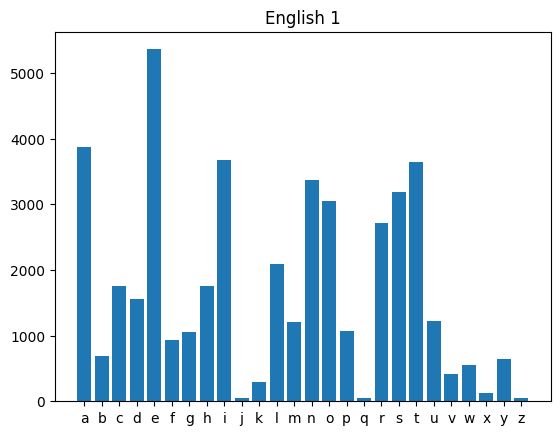

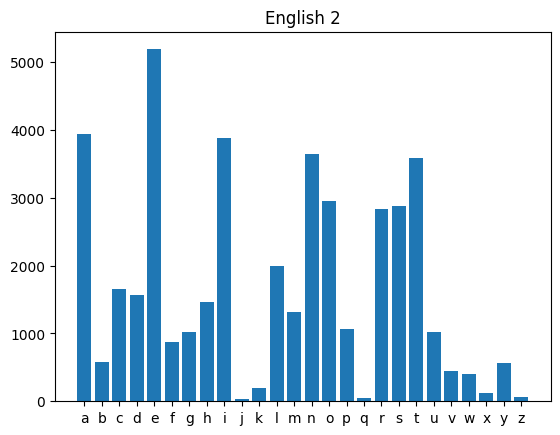

In [14]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

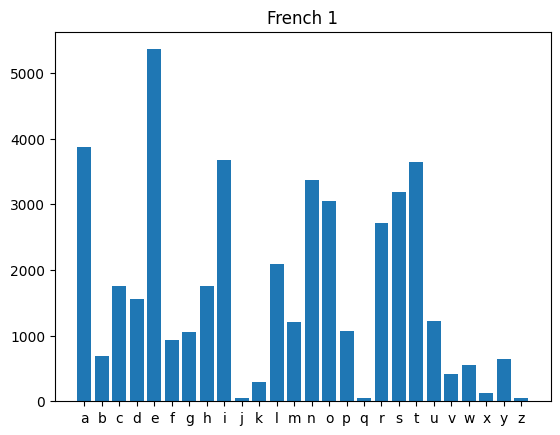

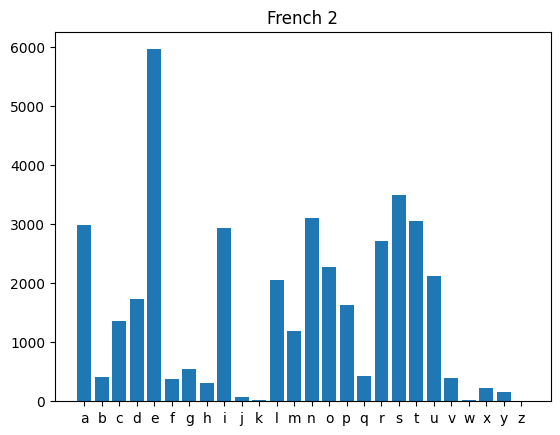

In [15]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

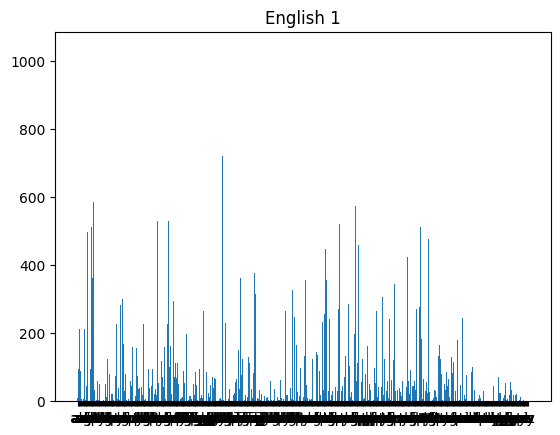

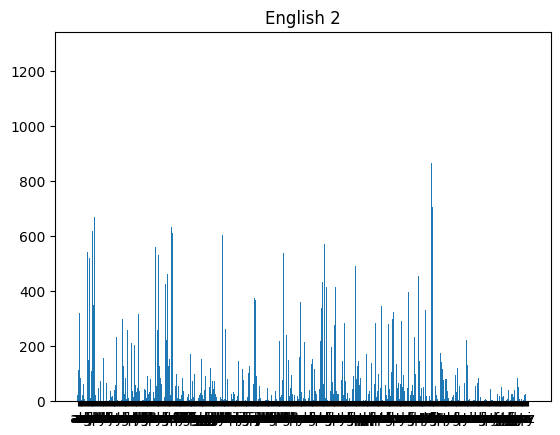

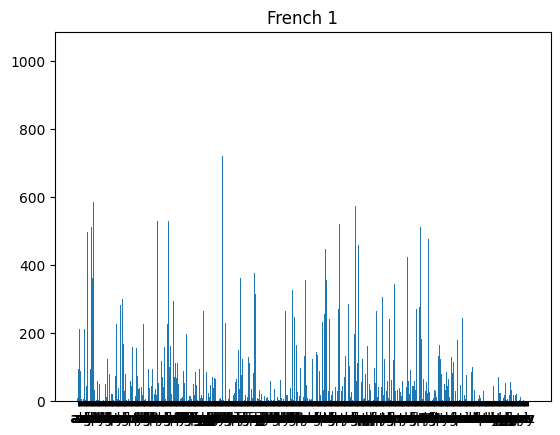

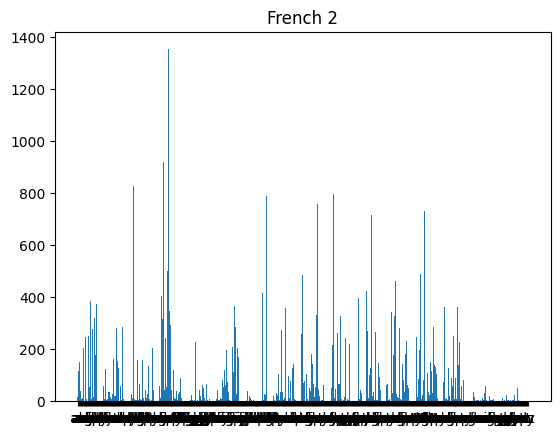

In [16]:
bigram_eng1 = Counter(ngrams(eng1,2))
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [17]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

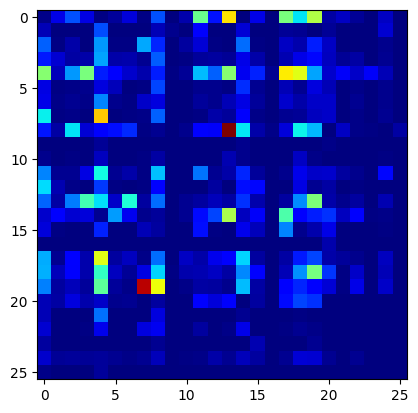

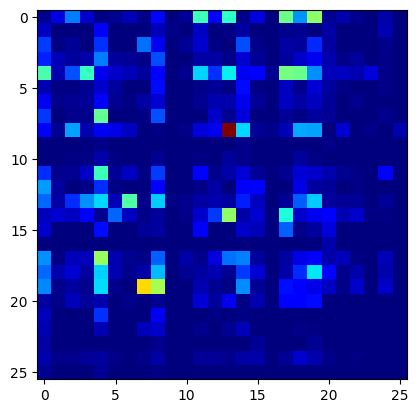

In [18]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

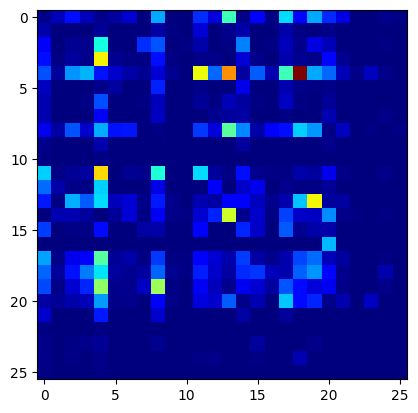

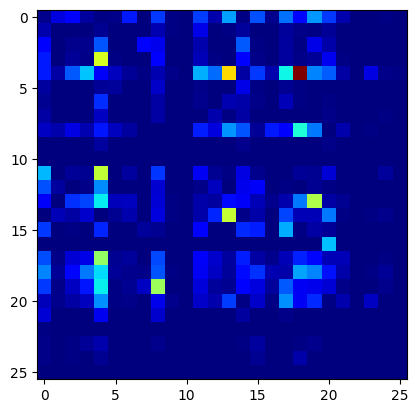

In [19]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

In [20]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [22]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('i', 'n') : 1034.0
('t', 'h') : 978.0
('h', 'e') : 720.0
('a', 'n') : 692.0
('e', 'r') : 682.0
('t', 'i') : 659.0
('r', 'e') : 644.0
('e', 's') : 643.0
('a', 't') : 584.0
('o', 'n') : 575.0

English 2:
('i', 'n') : 1277.0
('t', 'h') : 866.0
('t', 'i') : 706.0
('r', 'e') : 680.0
('o', 'n') : 672.0
('a', 't') : 668.0
('e', 'r') : 631.0
('a', 'r') : 616.0
('e', 's') : 612.0
('h', 'e') : 602.0

French 1:
('e', 's') : 2575.0
('e', 'n') : 1948.0
('l', 'e') : 1745.0
('d', 'e') : 1679.0
('n', 't') : 1663.0
('e', 'l') : 1642.0
('o', 'n') : 1546.0
('t', 'i') : 1397.0
('t', 'e') : 1348.0
('i', 'n') : 1182.0

French 2:
('e', 's') : 1353.0
('e', 'n') : 919.0
('d', 'e') : 826.0
('o', 'n') : 797.0
('l', 'e') : 789.0
('n', 't') : 760.0
('t', 'i') : 731.0
('r', 'e') : 717.0
('i', 's') : 525.0
('e', 'r') : 500.0


In [21]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [23]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

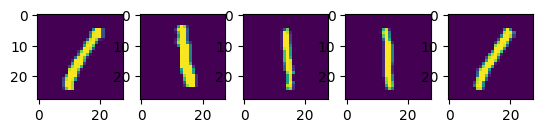

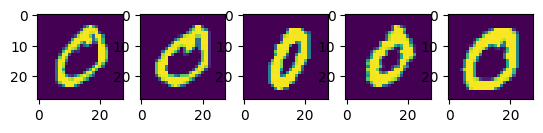

In [24]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [25]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

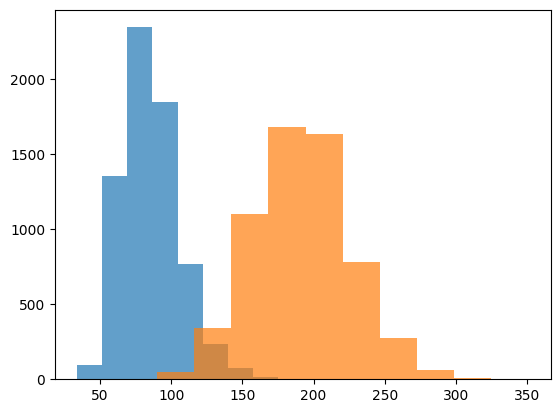

In [26]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

In [27]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

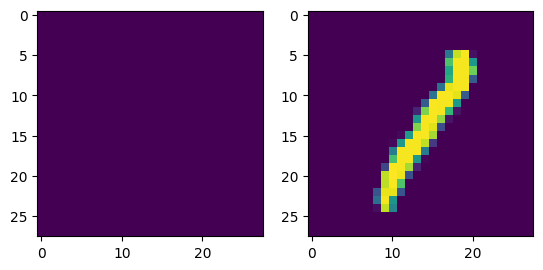

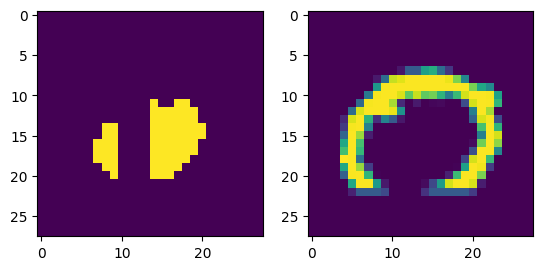

In [28]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

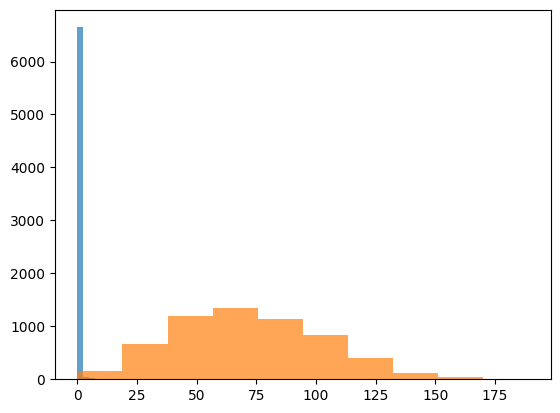

In [29]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

In [30]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

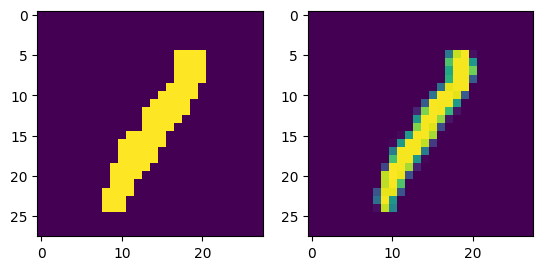

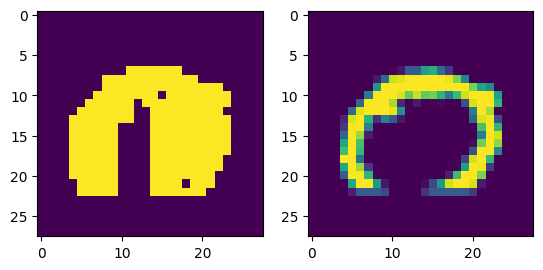

In [31]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

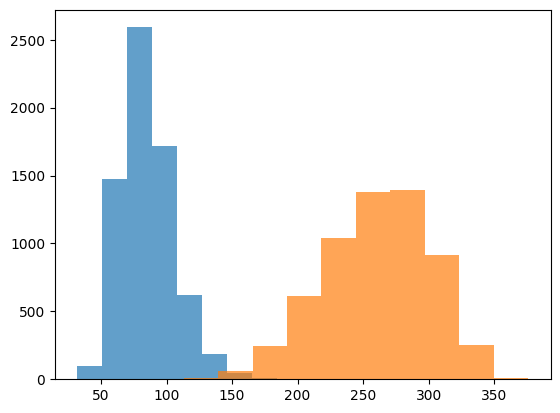

In [32]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

In [33]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

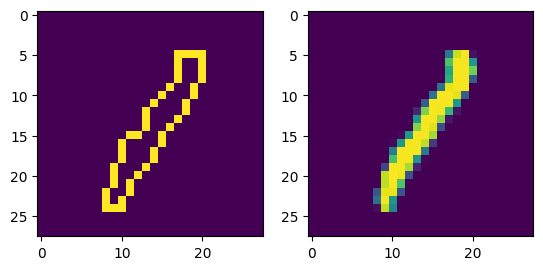

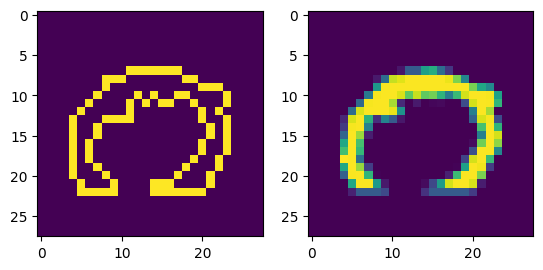

In [34]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

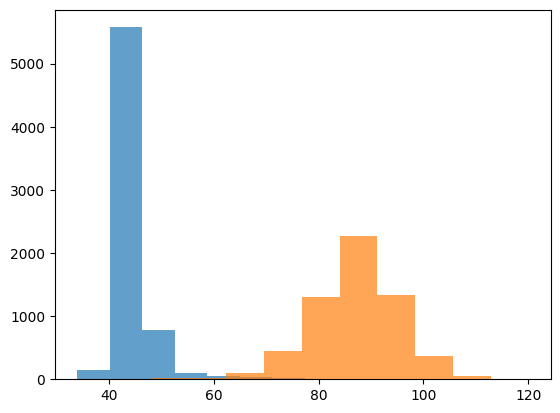

In [35]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

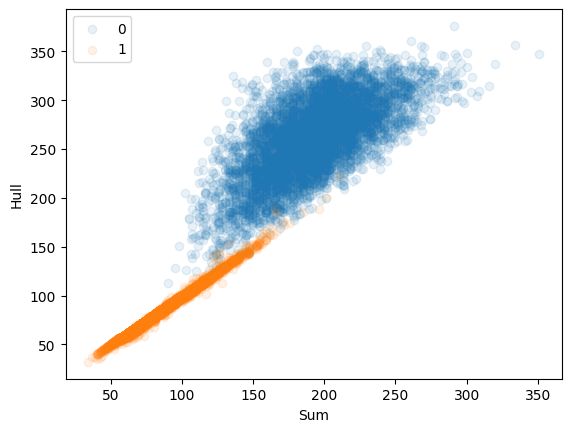

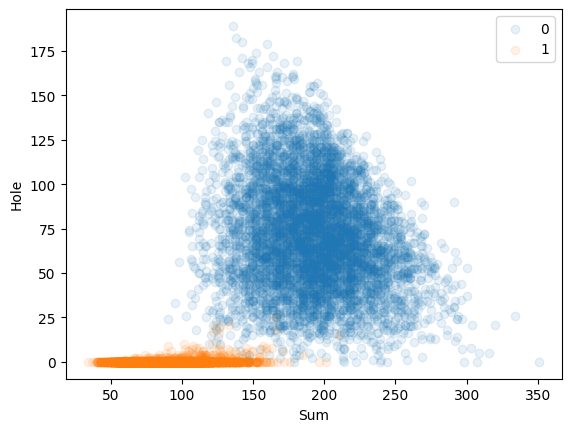

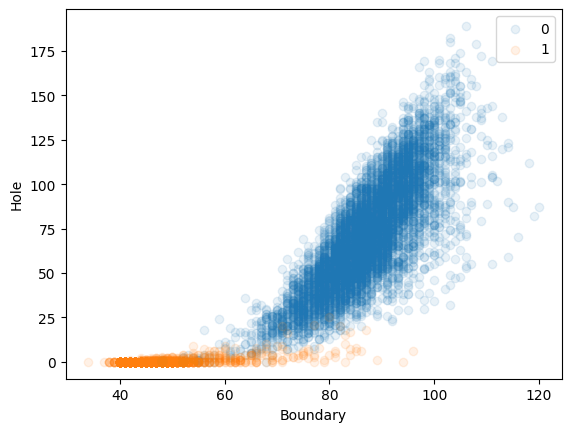

In [36]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

In [37]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()